# Solving Poisson's Equation Exactly

Given a charge distribution, the electric potential is given by the formula
$$-\nabla^2 \phi(z) = \frac{\rho(z)}{\epsilon}$$

where $\epsilon$ is the relative permitivity of the medium (in this case water)

In order to get the charge distribution for this particular charge density, we use the Debye-Huckel theory for electrolyte solutions. The theory gives the charge density as a function of the potential itself

$$\rho(z) = \sum_s q_s C_s e^{q_s \phi(z)}$$

where the sum is over the different species on the solution, $q_s$ the charge, $C_s$ the concentration of each species.

The geometry considered for this particular problem is as follows



In [33]:
from IPython.display import Image
#Image("img/geometry.png")

## Exact Solution for a Binary Salt

For a binary salt, the solution can be calculated analitically. It is found to be

$$\phi (z) = \frac{2}{\beta q} log\left(\frac{1+tanh\left(\frac{q\beta V_0}{4}\right)e^{-\kappa z}}{1-tanh\left(\frac{q\beta V_0}{4}\right)e^{-\kappa z}}\right)$$


The electric field is 

$$E(z) = \frac{4\kappa}{\beta q}\frac{\tanh\left(\frac{q\beta V_0}{4}\right)e^{-\kappa z}}{1-\tanh^2\left(\frac{q\beta V_0}{4}\right)e^{-2\kappa z}}$$




## Linearization of the Poisson Equation

For more complex solutions, such as more than two electrolytes, the solution cannot be treated analytically. Therefore, we approximate Poisson's equation by expanding the Boltzmann factor in the Debye-Huckel theory to first order in $\phi(z)$

$$-\frac{d^2}{dz^2} \phi(z) =\frac{1}{\epsilon}\sum_s q_s C_s e^{q_s \phi(z)}$$
$$=\sum_s q_s C_s (1-q_s \phi(z))$$

Due to electroneutrality of the bulk solution, the first term in the right hand side is zero. Therefore, 
$$\frac{d^2}{dz^2}\phi (z) =\kappa^2 \phi(z))$$

where we have defined 
$$\kappa = \sqrt{\frac{\sum_s C_s q_s^2}{\epsilon}}$$

Given the boundary conditions $\phi(0) = V_0$, and $\phi(\infty) = 0$, the solution is trivialy found to be

$$\phi(z) = V_0 e^{-kz},$$





## Comparison Between Exact and Linearized Poisson's Equations

First we define all the parameters for our model in MKS units. 

In [47]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn

#Parameters
kb = 1.38064852E-23
T = 293
V = -0.15
q = 2*1.60217662E-19 #2e
C = 0.1*6.02E26 #Molar Numero de avogadro
b = 1/(kb*T)
epsilon_0 = 8.85418782E-12
epsilon = 80.1*epsilon_0
k = np.sqrt(2*b*q**2*C/epsilon)

############# Range #############
x = np.arange(0, 1E-8, 1E-12)
#################################


#################### Exact Phi ####################
phi = (2/(b*q))*np.log((1+np.tanh(q*b*V/4)*np.exp(-k*x))/(1-np.tanh(q*b*V/4)*np.exp(-k*x))) 

################### Linearized Phi###################
linear_phi = V*np.exp(-k*x)


Next we plot both the linearized and the exact $\phi(z)$, and the error obtained with the aproximated form

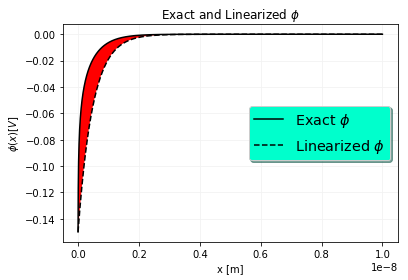

In [48]:
################### Plot Options ###################
fig, ax = plt.subplots()
ax.plot(x, phi, 'k', label='Exact $\phi$', zorder = 11)
ax.plot(x , linear_phi,'k--', label='Linearized $\phi$', zorder = 12)

ax.fill_between(x, phi, linear_phi, where=linear_phi<phi, facecolor='red', zorder = 10)
legend = ax.legend(loc='center right', shadow=True, fontsize='x-large')
# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')
plt.xlabel('x [m]')
plt.ylabel('$\phi(x) [V]$')
plt.title('Exact and Linearized $\phi$')
plt.grid(True, color= '#F2F2F2')


plt.savefig('comparison-phi.eps', format='eps', dpi=1000)
plt.show()


In [49]:
error = linear_phi-phi 
std_dev = np.std(error)
print(std_dev)

0.012240367006817587


Next we calculate the error commited in doing the aproximation using NumPy library. 
The error is $\sigma = 0.0122403670068$

## Plotting The Zero Order Electric Field

\begin{align}
\nonumber
E(0) = \frac{4\kappa}{\beta q}\frac{\tanh\left(\frac{q\beta V_0}{4}\right)}{1-\tanh^2\left(\frac{q\beta V_0}{4}\right)} = \frac{\sigma}{\epsilon}
\end{align}



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


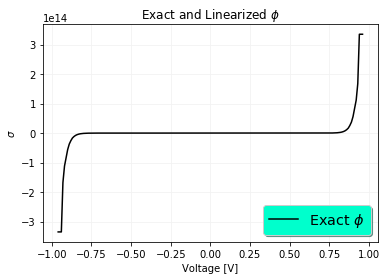

In [66]:
V = np.arange(-1, 1, 0.01)
sig = epsilon * (4 * k / ( b * q )) * np.tanh(q * b * V / 4) / (1 - (np.tanh(q * b * V / 4)) ** 2)

################### Plot Options ###################
fig, ax = plt.subplots()
ax.plot(V, sig, 'k', label='Exact $\phi$', zorder = 11)


legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')
plt.xlabel('Voltage [V]')
plt.ylabel('$\sigma$')

plt.title('Exact and Linearized $\phi$')
plt.grid(True, color= '#F2F2F2')


plt.savefig('sig_of_V.eps', format='eps', dpi=1000)
plt.show()


Solving for $V$ we get

\begin{align}
\nonumber
\tanh{\left(\frac{q\beta V_\pm}{4}\right)} = \frac{1}{\beta q \sigma} \left( - 2 \kappa \epsilon \pm \sqrt{4 \kappa^2 \epsilon^2 + \beta^2 q^2 \sigma^2} \right)
\end{align}

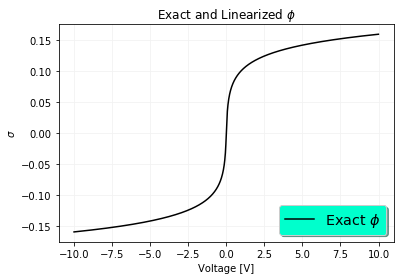

In [71]:
sig = np.arange(-10, 10, 0.01)
Vp = (4 / ( q * b ) ) * np.arctanh(( 1 / (b * q * sig) ) * ( -2 * k * epsilon + np.sqrt(4 * k ** 2 * epsilon ** 2 + b ** 2 * q ** 2 * sig ** 2 )))
#Vm = np.arctanh(( 1 / (b * q * epsilon) ) * ( -2 * k * sig - np.sqrt(4 * k ** 2 * epsilon ** 2 + b ** 2 * q ** 2 * sig ** 2 )))
################### Plot Options ###################
fig, ax = plt.subplots()
ax.plot(sig, Vp, 'k', label='Exact $\phi$', zorder = 11)

legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')
plt.xlabel('Voltage [V]')
plt.ylabel('$\sigma$')
plt.title('Exact and Linearized $\phi$')
plt.grid(True, color= '#F2F2F2')


plt.savefig('V_of_sig.eps', format='eps', dpi=1000)
plt.show()
